Assignment 3: Model Interpretability

Dataset Used: Music Genre Classification Dataset obtained from Kaggle.

Link: https://www.kaggle.com/datasets/purumalgi/music-genre-classification/

About the Dataset:
The Music Genre Classification dataset consists of 16 independent features and one dependent feature - "Class"
The objective is to use the independent features to predict between the genres - Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, and Bollywood
The data consists of 17,996 rows (or data instances) that is observed to have missing values and the independent variables are a mixture of string, integers and float values.

**Description of the features present in the dataset**

1. **artist name** - The name of the artist or group that performed or created the track.
2. **track name** - The title of the musical track or song.
3. **popularity** - A measure indicating the popularity of the track, often based on play counts, likes, or other metrics.
4. **danceability** - A metric indicating how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity.
5. **energy** - A measure of intensity and activity in the track, often associated with the track's speed and loudness.
6. **key** - The primary musical key in which the track is composed.
7. **loudness** - The overall loudness or volume of the track, typically measured in decibels (dB).
8. **mode** - Indicates the modality of the track, usually represented as major or minor.
9. **speechiness** - A measure indicating the presence of spoken words in the track. Higher values suggest more speech-like sounds, while lower values indicate more musical and melodic content.
10. **acousticness** - A metric indicating the amount of acoustic sound in the track. Higher values suggest a more acoustic track without electronic instruments.
11. **instrumentalness** - A measure of the track's content being instrumental. Higher values indicate fewer vocals or no vocals at all.
12. **liveness** - Indicates the presence of a live audience in the recording. Higher values suggest a live performance.
13. **valence** - A measure of the musical positiveness or happiness conveyed by the track. Higher values indicate more positive and cheerful tracks.
14. **tempo** - The speed or pace of the track, typically measured in beats per minute (BPM).
15. **duration in milliseconds** - The total length or duration of the track, measured in milliseconds.
16. **time_signature** - The rhythmic pattern of the track, indicating how many beats are in each measure.
17. **Class** - The genre of the music


The notebook aims at addressing the following questions with the current dataset.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

The Logistic Regression, XGB Boost and h20 based automl model will be used for prediction and they will be interpretted by SHAP, Partial Dependence Plots and LIME methods to gain inference about the models

SHAP (SHapley Additive exPlanations) analysis is a tool for interpreting  machine learning models. It provides a framework for understanding the contribution of each feature to the model's predictions, enhancing transparency and trust in the model's decision-making process.

1. Shapley Values:
   - SHAP is based on Shapley values from cooperative game theory, assigning each feature a unique contribution to the prediction.
   - It considers all possible combinations of features and calculates their average marginal contribution to predictions.

2. Model-Agnostic:
   - SHAP is model-agnostic, applicable to various machine learning algorithms.
   - It can be used with black-box models, enabling interpretation without access to internal model details.

3. Interpretability:
   - SHAP values provide a clear breakdown of how each feature influences a particular prediction.
   - Users can easily grasp the factors contributing positively or negatively to an outcome.

Partial Dependence Plots (PDP) are a valuable tool for interpreting the relationship between a specific feature and the predicted outcome in a machine learning model. They provide insights into how the model's predictions change with variations in a single input variable while keeping other features constant.


1. Isolation of a Feature:
   - PDP focuses on one feature while holding all other features constant to isolate its effect on the model's predictions.

2. Data Perturbation:
   - The chosen feature is systematically varied across its range, and the model's predictions are recorded at each point.

3. Prediction Visualization:
   - The average or individual predictions are then plotted against the varying values of the feature, creating a graphical representation of the relationship.

LIME (Local Interpretable Model-agnostic Explanations) is a technique designed to explain the predictions of machine learning models by approximating their behavior at the local level. It is particularly useful for understanding individual predictions rather than the global behavior of a model.

1. Local Interpretability:
   - LIME focuses on explaining the predictions of a model for a specific instance or observation rather than explaining the entire model.

2. Perturbation and Sampling:
   - LIME generates perturbed samples around the instance of interest by randomly altering feature values while keeping other features fixed.

3. Model Agnosticism:
   - It is model-agnostic, meaning it can be applied to any machine learning model without requiring knowledge of its internal architecture or parameters.

4. Local Model Fitting:
   - LIME then fits an interpretable, locally weighted model (such as linear regression) to the perturbed samples, approximating how the complex model behaves in the vicinity of the instance being explained.

5. Interpretability:
   - The locally fitted model provides insights into how changes in different features impact the prediction for that specific instance.

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [219]:
df = pd.read_csv("https://raw.githubusercontent.com/Agash912/Data-Science/main/dataset.csv") #loading the dataset

In [220]:
df.head(5)

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [221]:
df.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

The dataset has 2 categorical features and 14 numerical features along with one numerical feature "Class", that has to be predicted.

In [222]:
df.isnull().sum() # checking the total of null values in all columns

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

There are missing values present in the dataset



In [223]:
# displaying missing values in form of percentage
missing_data_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_missing_data_percentage = missing_data_percentage[missing_data_percentage > 0]

print("Columns with missing data and the percentage of missing values:")
print(columns_with_missing_data_percentage)

Columns with missing data and the percentage of missing values:
Popularity           2.378306
key                 11.191376
instrumentalness    24.322072
dtype: float64


The features Popularity, Key and Instrumentalness is observed to have missing data points with 2.3%, 11.19% and 24.3% respectively. This should be addressed by using impute - methods before applying a predictive model

We will replace the missing values present in the dataset with their respective mean values and scale the data using MinMax Scaler.
After scaling, all the values for each feature will be within the range [0, 1]

In [224]:
import pandas as pd

def replace_missing_with_mean(df):
    # Identify columns with missing values
    columns_with_missing = df.columns[df.isnull().any()]

    # Replace missing values with the mean of each column
    for column in columns_with_missing:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    return df

# Example usage:
# Assuming 'your_dataframe' is your pandas DataFrame
df = replace_missing_with_mean(df)


In [225]:
df = df.drop(columns=['Artist Name', 'Track Name'], axis =0) # Dropping Artist Name, Track Name and transforming the data to scale
from sklearn.preprocessing import MinMaxScaler
x = df.iloc[:,0:14]
y = df.iloc[:,-1]
sc = MinMaxScaler()
X = sc.fit_transform(x)
df.iloc[:,0:14] = X

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [226]:
df.head()

Popularity  danceability    energy  key  loudness  mode  speechiness  \
0    0.595960      0.854745  0.563991  0.0  0.847024   1.0     0.027882   
1    0.535354      0.346890  0.813996  0.2  0.792166   1.0     0.019410   
2    0.343434      0.402841  0.613992  0.5  0.765439   1.0     0.032172   
3    0.656566      0.853669  0.596992  0.9  0.809161   0.0     0.035389   
4    0.525253      0.115558  0.974999  0.1  0.863607   1.0     0.207507   

   acousticness  instrumentalness  liveness   valence     tempo  \
0      0.017169          0.178274  0.073879  0.910096  0.553969   
1      0.001104          0.004025  0.090173  0.569081  0.459689   
2      0.487952          0.000196  0.386702  0.794358  0.626804   
3      0.021285          0.178274  0.111426  0.569081  0.409271   
4      0.000170          0.016164  0.162028  0.075953  0.901766   

   duration_in min/ms  time_signature  Class  
0            0.158812            0.75      5  
1            0.170413            0.75     10  
2            0.074240            0.75      6  
3            0.117769            0.75      5  
4            0.155674            0.75     10

Now, the dataset is scaled. Next is to check if there is equal number of samples for each class. This is necessary to rule out bias towards the class that has higher samples, and also helps in developing a roboust ML model

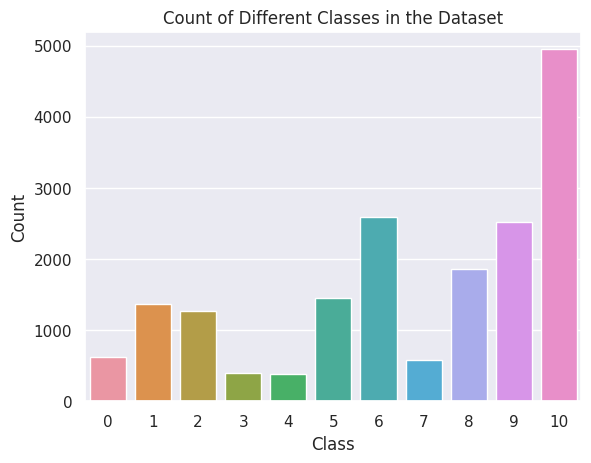

In [227]:
# Checking if there is class imbalance in the dataset
sns.set(style="darkgrid")  # Set the style of the plot
sns.countplot(data=df, x='Class')

# Add labels and a title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of Different Classes in the Dataset")

# Show the plot
plt.show()

It is evident that Class 10 has the most number of samples and Class 0,3,4,7 has lesser number of samples.
Also, all the classes does not have equal number of samples. Therefore, we use SMOTE to oversample the classes with lesser number of samples when compared to 10.
Undersampling technique is not used, since lesser number of samples could lead the ML model not to learn about the features properly

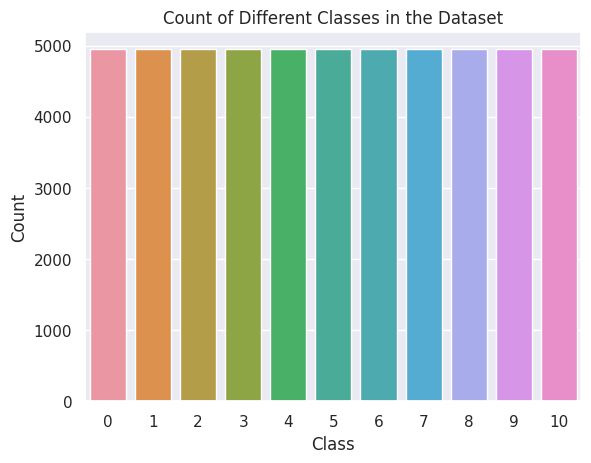

In [228]:
import imblearn
import sklearn
from imblearn.over_sampling import SMOTE

X = df.iloc[:,0:14] # Features
y = df['Class']  # Class labels

# Create a SMOTE instance
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# You can convert the resampled data back to a DataFrame if needed
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('Class', axis=1).columns), pd.DataFrame({'Class': y_resampled})], axis=1)
df = resampled_df
sns.set(style="darkgrid")  # Set the style of the plot
sns.countplot(data=df, x='Class')

# Add labels and a title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of Different Classes in the Dataset")

# Show the plot
plt.show()

Now, All the class has equal number of samples

In [ ]:
df.describe()

Popularity  danceability        energy           key      loudness  \
count  54439.000000  54439.000000  54439.000000  54439.000000  54439.000000   
mean       0.424921      0.522553      0.593067      0.490966      0.748353   
std        0.167421      0.170211      0.255038      0.288819      0.113822   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.320871      0.414749      0.416547      0.300000      0.701855   
50%        0.427000      0.525857      0.623992      0.497015      0.775497   
75%        0.532550      0.637035      0.803621      0.700000      0.827801   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               mode   speechiness  acousticness  instrumentalness  \
count  54439.000000  54439.000000  54439.000000      54439.000000   
mean       0.666158      0.057578      0.363875          0.204211   
std        0.471588      0.085107      0.357731          0.290772   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.013778      0.024572          0.001536   
50%        1.000000      0.025032      0.225887          0.087201   
75%        1.000000      0.056944      0.717131          0.178274   
max        1.000000      1.000000      1.000000          1.000000   

           liveness       valence         tempo  duration_in min/ms  \
count  54439.000000  54439.000000  54439.000000        54439.000000   
mean       0.174358      0.482120      0.478536            0.097333   
std        0.143706      0.248903      0.150773            0.085685   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.090534      0.281802      0.360884            0.000003   
50%        0.116483      0.479177      0.464897            0.122420   
75%        0.211074      0.680673      0.578347            0.156840   
max        1.000000      1.000000      1.000000            1.000000   

       time_signature         Class  
count    54439.000000  54439.000000  
mean         0.726959      5.000000  
std          0.088352      3.162307  
min          0.000000      0.000000  
25%          0.750000      2.000000  
50%          0.750000      5.000000  
75%          0.750000      8.000000  
max          1.000000     10.000000

<Axes: >

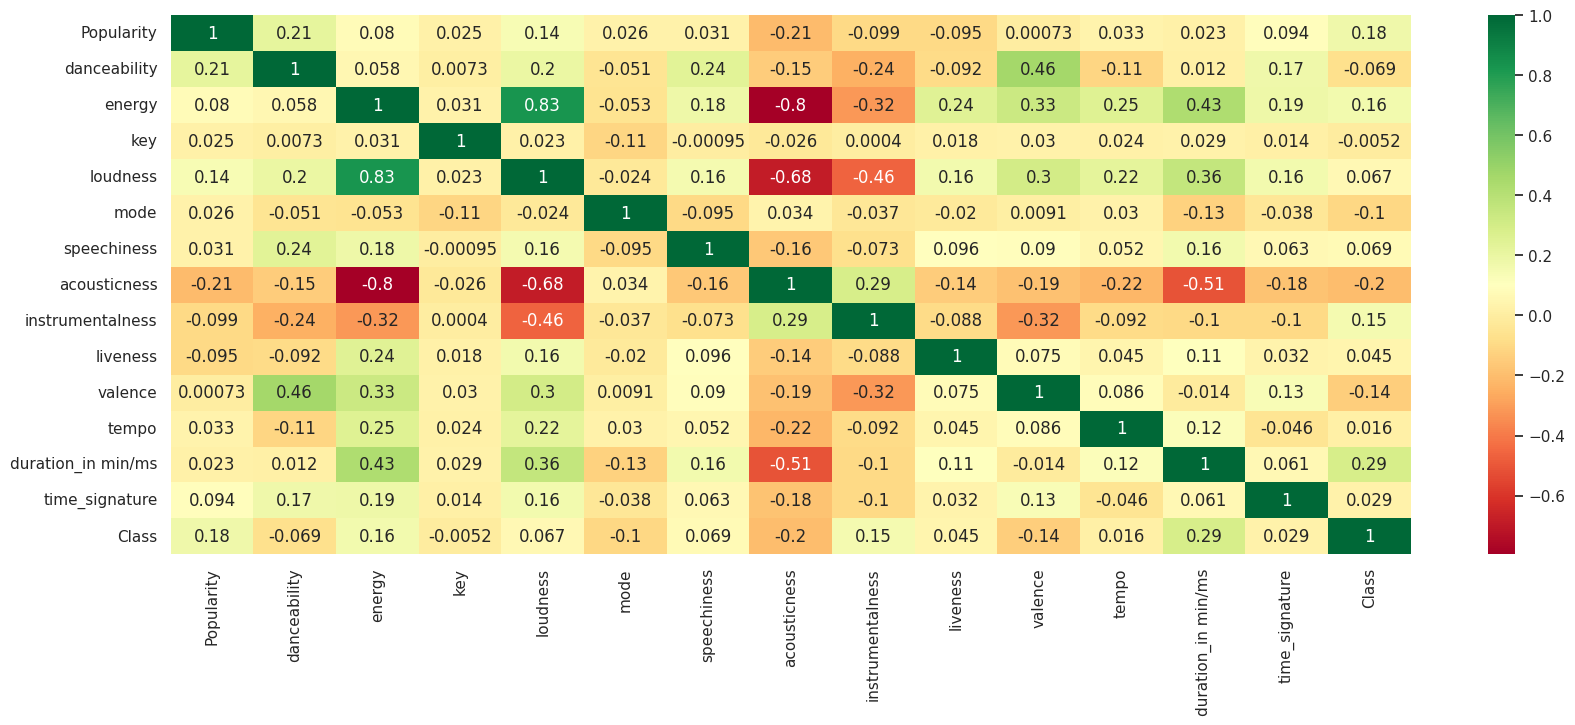

In [ ]:
cor = df.corr()
plt.figure(figsize=(20, 7))
sns.heatmap(cor, annot=True, cmap="RdYlGn")

Postive Corelation: Variable 2 increases if variable 1 increases and variable 2 decreases if variable 1 decreases

Negative Corelation: Variable 2 decreases if variable 1 increases and variable 2 increases if variable 1 decreases

The predictor variables are mostly independent except that

loudness & energy is 83% positively corelated (which makes most sense),

danceability & valence is 46% positively corelated,

energy & duration_in min/ms is approximately 43% positively corelated

Energy & Acousticness is 80% negatively corelated

Loudness & Instrumentalness is 46% negatively corelated (which makes most sense)

Loudness & Acousticness is 68% negatively corelated (which makes most sense)

Acousticness & duration_in min/ms is 51% negatively corelated

Prediction using various Machine Learning models.
Splitting the data into test and training data, with 90% for training and 10% for testing


In [ ]:
df_master=df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [229]:
X = df.iloc[:,0:14]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

Logistic regression for multiclass classification extends binary logistic regression to handle more than two classes. It uses multiple logistic functions, each associated with a unique class. The model calculates probabilities for each class and assigns the class with the highest probability as the predicted class.

In [ ]:
model_lr = LogisticRegression()
result = model_lr.fit(X_train, y_train)
prediction = model_lr.predict(X_test)
accuracyScore = accuracy_score(prediction, y_test)
print(accuracyScore)

0.5822924320352681


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the classifier when it predicts positive instances.

Recall: Recall (or Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in actual class. It measures the ability of the classifier to capture all the possible positive instances.

F1-Score: The F1-Score is the weighted average of precision and recall. It ranges from 0 to 1, where 1 is the best possible F1-Score.

Support: The number of actual occurrences of the class in the specified dataset.

In [ ]:
report = classification_report(y_test, prediction)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       508
           1       0.22      0.07      0.11       493
           2       0.52      0.71      0.60       525
           3       0.81      0.78      0.79       480
           4       0.72      0.81      0.76       465
           5       0.72      0.70      0.71       487
           6       0.33      0.23      0.27       482
           7       0.91      0.91      0.91       498
           8       0.55      0.75      0.63       507
           9       0.42      0.42      0.42       513
          10       0.25      0.27      0.26       486

    accuracy                           0.58      5444
   macro avg       0.56      0.58      0.56      5444
weighted avg       0.56      0.58      0.56      5444



The model demonstrates varied performance across different classes. It excels in accurately predicting classes 3, 4, 5, and 7, as indicated by high precision, recall, and F1-scores. On the other hand, classes 1, 6, and 10 show poor performance with low precision, recall, and consequently, low F1-scores. Class 2 exhibits a moderate balance between precision and recall.

The overall accuracy of the model is 58%, suggesting that it correctly classifies instances roughly 58% of the time. The macro average F1-score, considering equal weight for all classes, is 0.56. The weighted average F1-score, accounting for class imbalances, is also 0.56.

In [ ]:
coefficients = model_lr.coef_
intercept = model_lr.intercept_

# Interpretation for each class
for i in range(len(model_lr.classes_)):
    class_name = f"Class {model_lr.classes_[i]}"
    print(f"\nInterpretation for {class_name}:")
    for j in range(X.shape[1]):  # Assuming X is your feature matrix
        feature_name = X.columns[j]
        coef_value = coefficients[i, j]
        print(f"The coefficient for {feature_name} in {class_name} is {coef_value:.4f}")


Interpretation for Class 0:
The coefficient for Popularity in Class 0 is -2.9761
The coefficient for danceability in Class 0 is 1.3708
The coefficient for energy in Class 0 is -1.8355
The coefficient for key in Class 0 is 0.0081
The coefficient for loudness in Class 0 is 3.9686
The coefficient for mode in Class 0 is 0.1051
The coefficient for speechiness in Class 0 is -4.4408
The coefficient for acousticness in Class 0 is 0.9884
The coefficient for instrumentalness in Class 0 is -2.2040
The coefficient for liveness in Class 0 is -2.3569
The coefficient for valence in Class 0 is -2.7645
The coefficient for tempo in Class 0 is 1.5944
The coefficient for duration_in min/ms in Class 0 is -29.1121
The coefficient for time_signature in Class 0 is 0.7150

Interpretation for Class 1:
The coefficient for Popularity in Class 1 is 1.2286
The coefficient for danceability in Class 1 is -1.0159
The coefficient for energy in Class 1 is 0.8700
The coefficient for key in Class 1 is 0.0938
The coeffici

The coefficients represent the change in the log-odds of the target class for a one-unit change in the corresponding feature.
A positive coefficient means that as the feature increases, the log-odds of being in Class also increase.
A negative coefficient means that as the feature increases, the log-odds of being in Class decrease.

Based on the coefficients of the logistic regression model for each class:

1. **Class 0:** This class is characterized by lower popularity, lower danceability, lower energy, lower loudness, and higher acousticness. Duration also plays a significant role, with a strong negative coefficient.

2. **Class 1:** This class is associated with higher popularity, moderate danceability, moderate energy, and positive coefficients for key, mode, and time_signature. Duration has a substantial positive impact on this class.

3. **Class 2:** This class tends to have very low popularity, low danceability, low energy, and is distinguished by high valence and tempo. Duration also has a notable positive impact.

4. **Class 3:** Class 3 is characterized by very low popularity, very low danceability, high energy, high acousticness, and high valence. Duration has a substantial negative impact.

5. **Class 4:** This class is associated with high popularity, moderate danceability, low energy, high loudness, and a distinctive negative impact from speechiness and duration.

6. **Class 5:** This class is characterized by moderate popularity, very high danceability, low energy, high speechiness, and a positive impact from acousticness and instrumentalness.

7. **Class 6:** Class 6 is marked by lower popularity, lower danceability, moderate energy, and positive coefficients for key, loudness, and instrumentalness.

8. **Class 7:** This class has a mix of characteristics, with positive coefficients for popularity, mode, speechiness, and instrumentalness, and negative coefficients for energy, acousticness, valence, and duration.

9. **Class 8:** This class is associated with moderate popularity, very low danceability, very high energy, high loudness, and a strong negative impact from valence.

10. **Class 9:** Class 9 is characterized by higher popularity, higher danceability, lower energy, very high loudness, and positive coefficients for danceability, loudness, and speechiness.

11. **Class 10:** This class is marked by higher popularity, lower danceability, moderate energy, and positive coefficients for popularity, energy, mode, and acousticness.

In [ ]:
!pip install shap
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.Explainer(model_lr.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 5445it [07:17, 12.42it/s]                          


In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

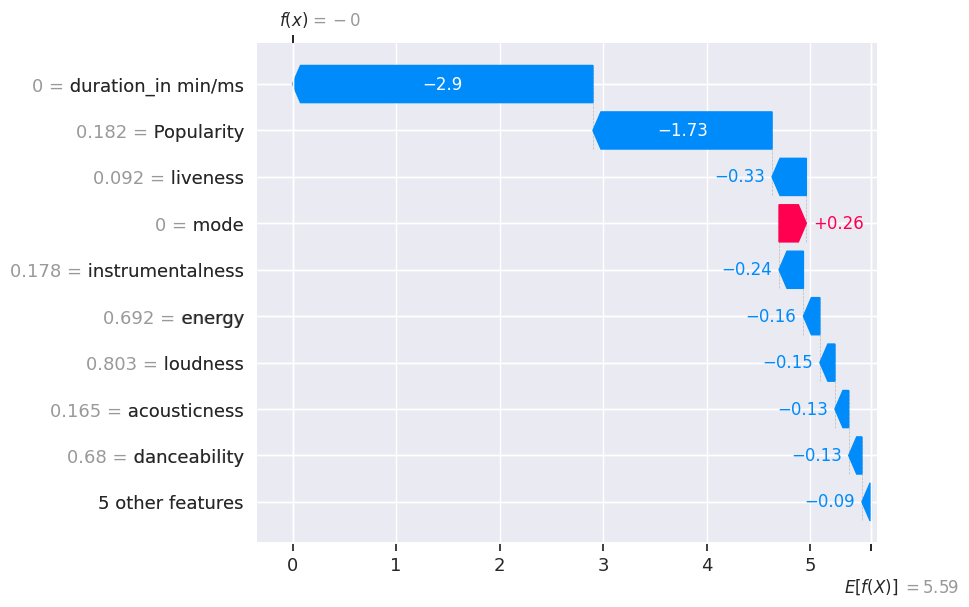

In [ ]:
sample_feature_importance(0, 'waterfall')


Inference for the first instance

1. **Duration_in_min/ms**: This feature has the most impact in reducing the prediction value by -2.9 SHAP value

2. **Popularity**: This feature also has a high negative impact on the model's prediction, shown by the long blue bar of SHAP value -1.73.

3. **Liveness**: This feature also has a negative impact, albeit much smaller than popularity.

4. **Mode**: Has a positive impact of SHAP value 0.26, contributing to the prediction.

5. **Instrumentalness**: Has a negative impact on the prediction, slightly less than liveness.

6. **Energy**: Has a moderate negative impact.

7. **Loudness**: Shows a small negative impact on the model's prediction.

8. **Acousticness**: Has a negative impact, similar to that of loudness.

9. **Danceability**: Has a slight positive impact on the prediction, indicated by the small red bar.

10. **5 Other Features**: These have a combined minor impact on the model's prediction.

11. The average prediction of the model over the training set is found to be 5.59.

SHAP values help in understanding the contribution of each feature to the prediction of an instance relative to the average prediction of the model.
Features with large absolute SHAP values are more important for the specific prediction. Negative values push the prediction lower than the expected value, while positive values push it higher.

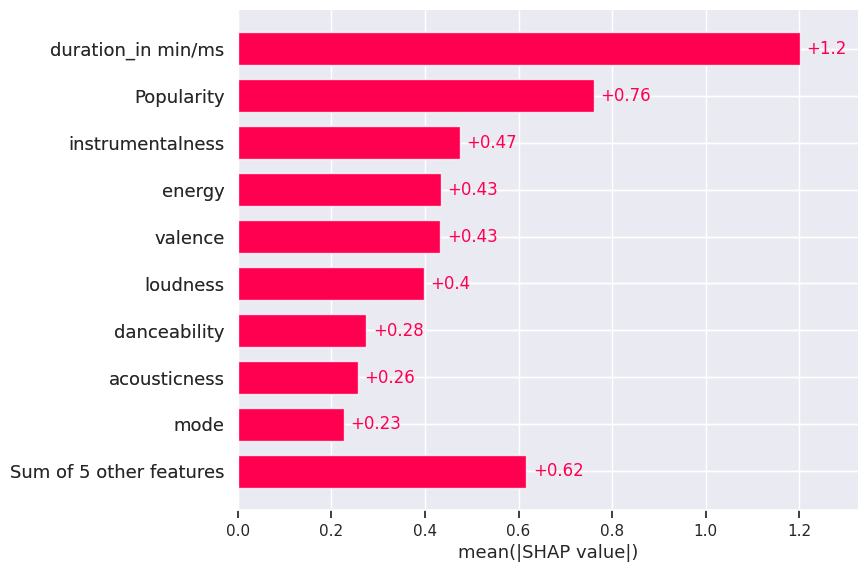

In [ ]:
shap.plots.bar(shap_values)

Inference for a summary of all instances in the dataset

1. **Duration_in_min/ms**: This feature has the largest mean absolute SHAP value. It has the strongest impact on the model's output across the dataset, on average.

2. **Popularity**: The second largest mean absolute SHAP value, indicating it also has a significant impact on the model's output.

3. **Instrumentalness**, **Energy**, and **Valence**: These features have similar mean absolute SHAP values, suggesting they have relatively similar impacts on the model's output.

4. **Loudness**: Slightly lower impact than the previous three features but still significant.

5. **Danceability**: Has a moderate impact on the model's output.

6. **Acousticness**: Also has a moderate impact, slightly less than danceability.

7. **Mode**: The smallest mean absolute SHAP value among the listed features, indicating it has the least impact on the model's output.

8. **Sum of 5 Other Features**: Their combined mean absolute SHAP value is substantial, which suggests that when taken together, these features have a significant effect on the model's output.

In [230]:
def partial_dependence_plot(model, feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

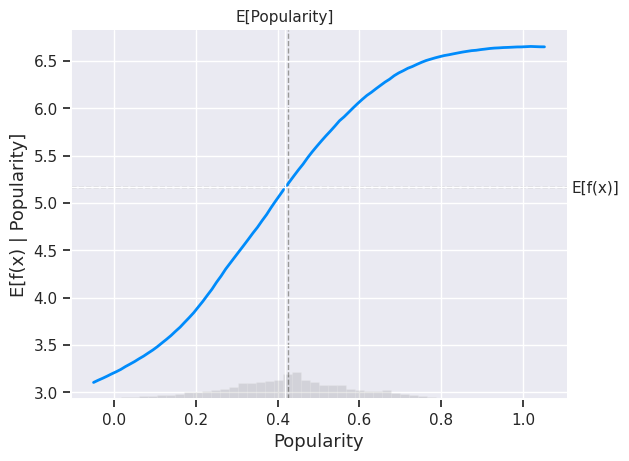

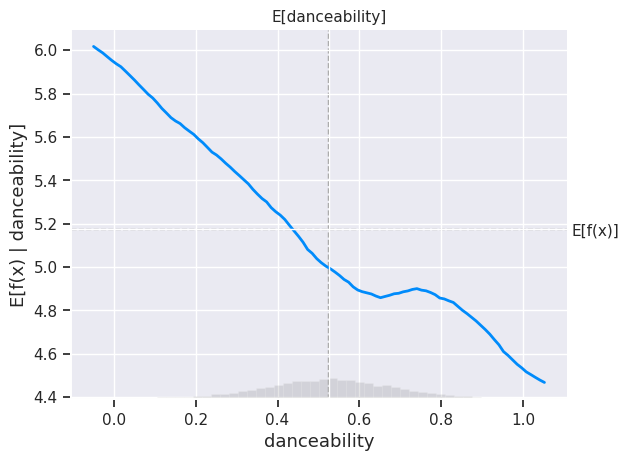

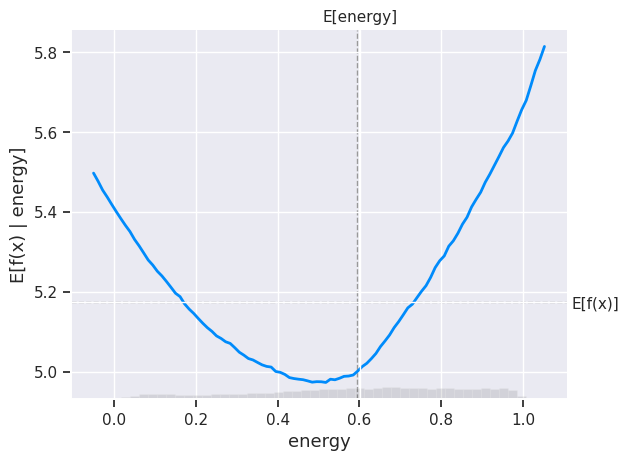

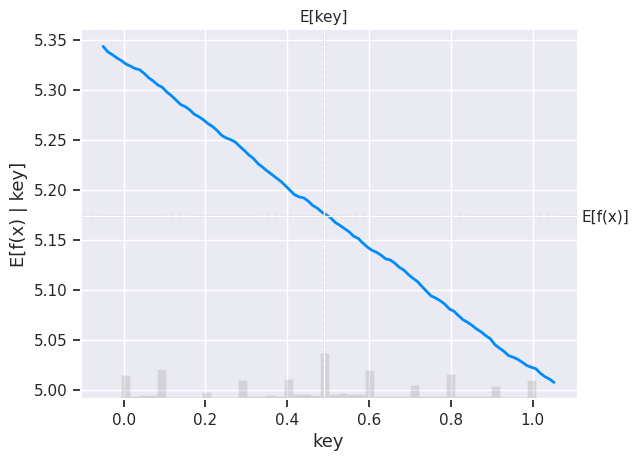

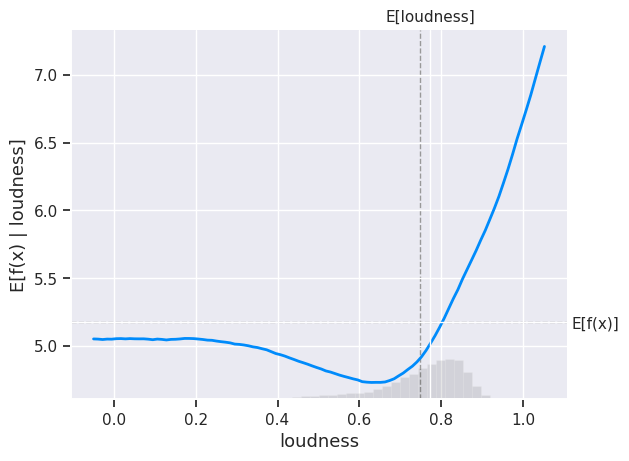

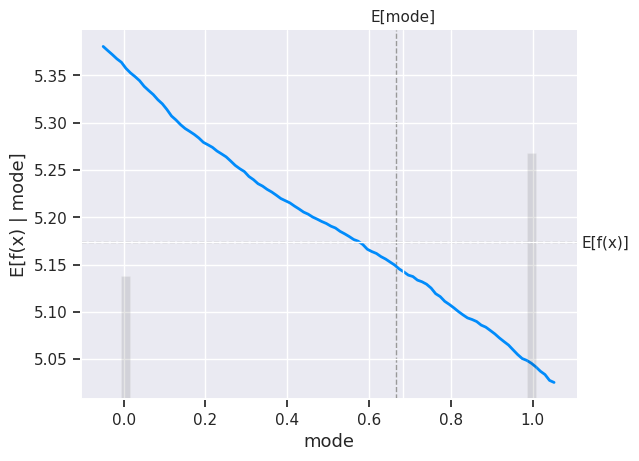

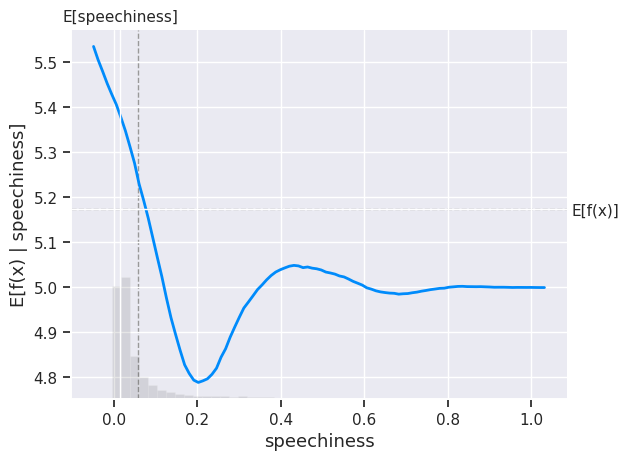

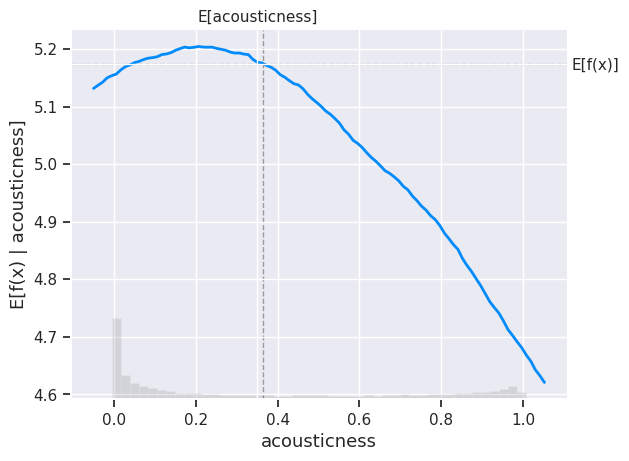

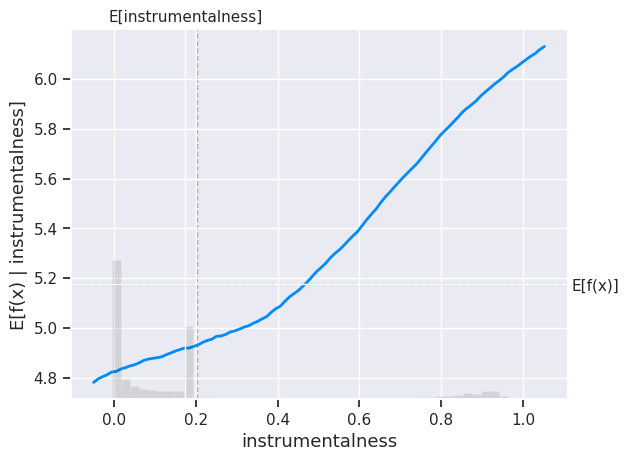

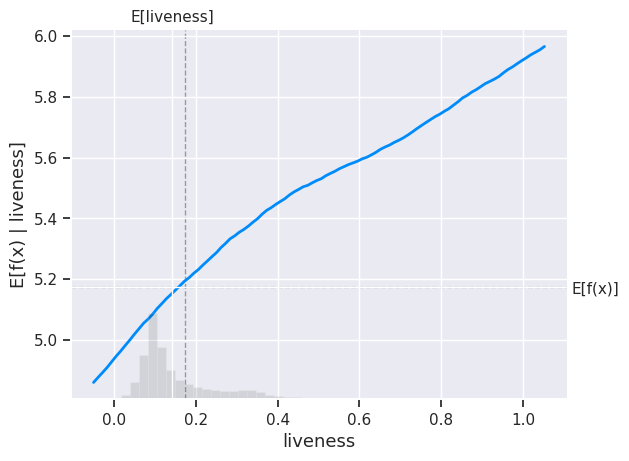

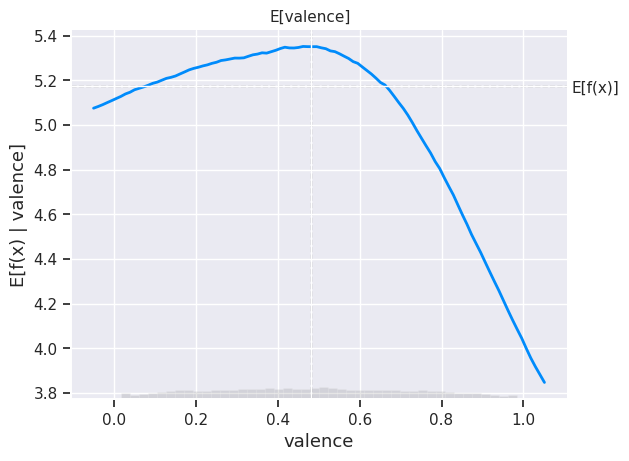

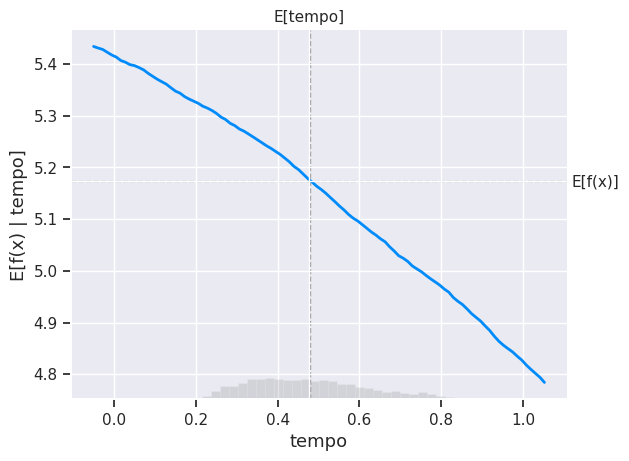

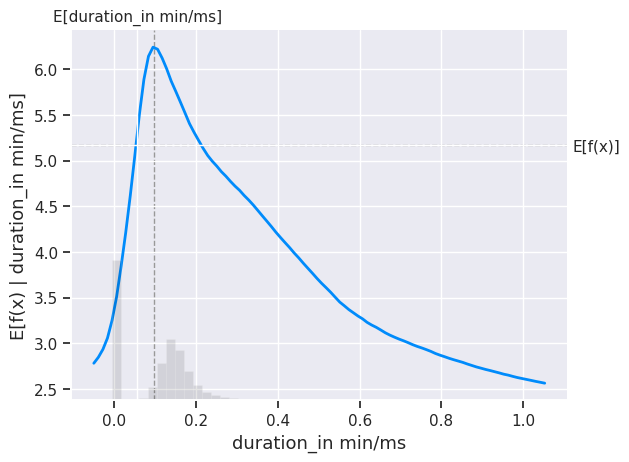

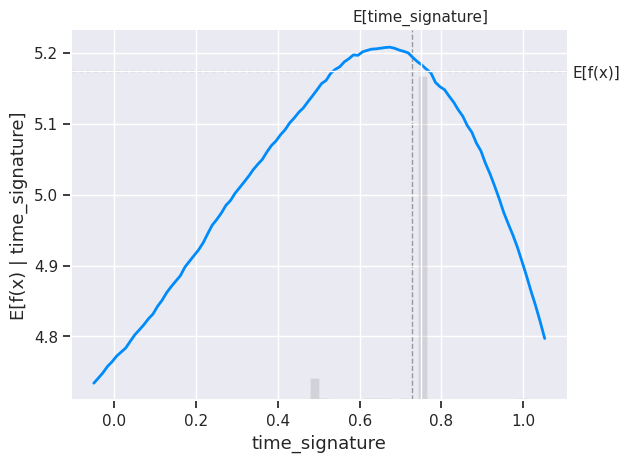

In [ ]:
for each in X.columns:
  partial_dependence_plot(model_lr,each)

The pdp plot denotes that,

As the Popularity, instrumentalness, liveness increases, the average predictive outcome also increases

As Danceability, key, mode, acousticness, tempo decreases, the average predictive outcome decreases.

Energy, loudness, speechiness, valence, duration_in_min/ms, time_signature has a mixed trend.

In [ ]:
!pip install lime

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
lime_linear_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode="regression",
    verbose=True,
)

In [ ]:
data_point = X_test.iloc[[0]]

# Define a prediction function for your model
predict_fn = lambda x: model_lr.predict_proba(x)[:, 1]

# Explain the instance
explanation = lime_linear_explainer.explain_instance(
    data_point.values[0],
    predict_fn,
    num_features=len(X_train.columns),
)

# Print the explanation
print(explanation.as_list())

Intercept 0.15103091318341677
Prediction_local [0.07140216]
Right: 0.017028557519727004
[('Popularity <= 0.32', -0.04122348882576747), ('time_signature <= 0.75', -0.03586480409941785), ('0.02 < acousticness <= 0.23', 0.026313217554635785), ('danceability > 0.64', -0.023845200525941943), ('0.78 < loudness <= 0.83', -0.021616203144005173), ('0.62 < energy <= 0.80', 0.0212125864041434), ('mode <= 0.00', -0.012433836131552384), ('0.00 < duration_in min/ms <= 0.12', -0.012420237170037993), ('tempo > 0.58', 0.008690337923845926), ('0.28 < valence <= 0.48', 0.00642630683996809), ('0.09 < liveness <= 0.12', 0.005874994153307333), ('0.03 < speechiness <= 0.06', 0.001314570592557388), ('0.30 < key <= 0.50', -0.0012424064361280724), ('0.09 < instrumentalness <= 0.18', -0.000814594295942814)]


X does not have valid feature names, but LogisticRegression was fitted with feature names


In [ ]:
explanation.show_in_notebook()
plt.show()


1. **Intercept:** `0.15103091318341677`
   - This is the intercept term of the logistic regression model that LIME uses to approximate. It represents the predicted value when all features are set to zero.

2. **Prediction_local:** `[0.07140216]`
   - This is the predicted outcome for the specific instance according to the local linear model.

3. **Right:** `0.017028557519727004`
   - This is the predicted outcome for the specific instance.

4. **Feature Contributions:**

   Each tuple consists of a feature condition and its contribution to the prediction:

   - `('Popularity <= 0.32', -0.04122348882576747)`: If the condition `Popularity <= 0.32` is satisfied, it contributes `-0.0412` to the prediction.
   - `('time_signature <= 0.75', -0.03586480409941785)`: If the condition `time_signature <= 0.75` is satisfied, it contributes `-0.0359'. likewise for all variables/ features

   The signs of the contributions indicate the direction of the effect. Positive values mean an increase in the prediction, while negative values mean a decrease.

Most important features are: Popularity (negative contribution), Time signature (negative contribution), acousticness (positive contribution), danceability&loudness (negative contribution).

Overall Inference: SHAP, PDP, LIME for Logistic Regression

Popularity consistently appears as a significant feature with both positive (PDP) and negative (LIME) impacts on the prediction.
Duration_in_min/ms is highlighted as the most important feature by SHAP, emphasizing its strong influence on the model.
Acousticness appears to have a positive impact on the prediction, as indicated by LIME.
Danceability and Loudness consistently show negative impacts on the prediction.


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

XGBoost is an ensemble learning method that combines the predictions of multiple weak learners (usually decision trees) to create a robust and accurate model.

It employs a gradient boosting framework, where each subsequent weak learner corrects the errors made by the previous ones.
The algorithm minimizes an objective function, which includes a loss function to measure the model's performance and a regularization term to prevent overfitting.

The final tree accumulates the knowledge of all preceding trees in the ensemble. Each tree corrects the errors and shortcomings of the combined ensemble up to that point. Therefore, the last tree contributes to refining the overall predictive power of the model.

In [ ]:
num_boost_rounds = 100  #
model_xgb = XGBClassifier(n_estimators=num_boost_rounds)
model_xgb.fit(X_train, y_train)
prediction = model_xgb.predict(X_test)
accuracyScore = accuracy_score(prediction, y_test)
print(accuracyScore)

0.7736958119030125


In [ ]:
from IPython.display import Image

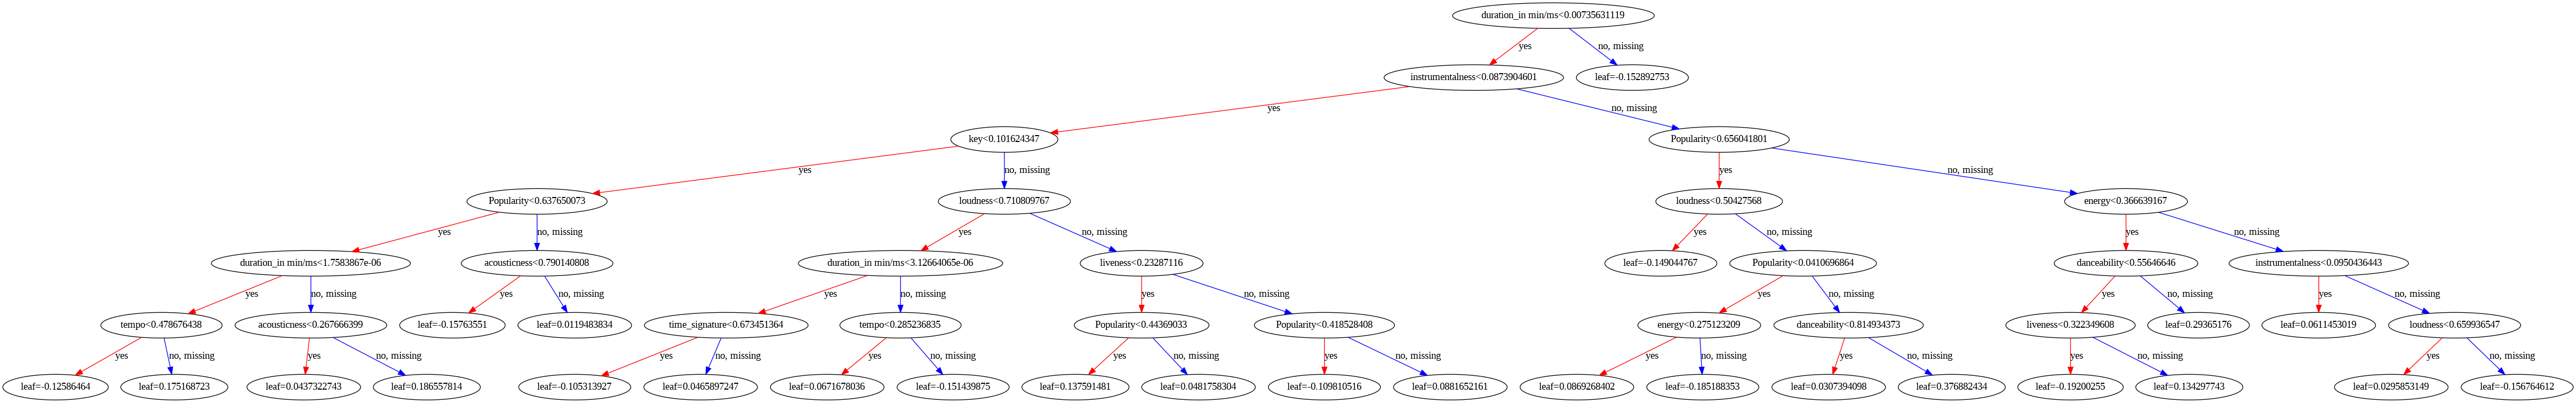

In [ ]:
# Visualize the last tree using graphviz
num_trees = num_boost_rounds - 1
tree_graph = xgb.to_graphviz(model_xgb, num_trees=num_trees)

# Save the graph as a PNG file
tree_graph.render("xgb_last_tree", format="png", cleanup=True)

# Display the graph in the notebook
Image(filename="xgb_last_tree.png")

The visualisation of the last tree present in XGB model denotes that, it considers duration_in min/ms as the starting point and has a rule to further classify datapoints. Each leaf node has a value, denoting the score that is used for the prediction of class.

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       508
           1       0.53      0.55      0.54       493
           2       0.76      0.82      0.79       525
           3       0.99      0.98      0.99       480
           4       0.96      1.00      0.98       465
           5       0.86      0.89      0.88       487
           6       0.49      0.38      0.42       482
           7       1.00      0.99      0.99       498
           8       0.76      0.82      0.79       507
           9       0.68      0.65      0.67       513
          10       0.45      0.46      0.46       486

    accuracy                           0.77      5444
   macro avg       0.77      0.77      0.77      5444
weighted avg       0.77      0.77      0.77      5444



Here, the macro average, which treats all classes equally, and the weighted average, which accounts for class imbalances, both stand at 0.77. This suggests that, on average, the model maintains consistent performance across classes, considering their respective support.

A benefit of using SMOTE.

In [ ]:
explainer = shap.Explainer(model_xgb.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 5445it [1:59:44,  1.32s/it]


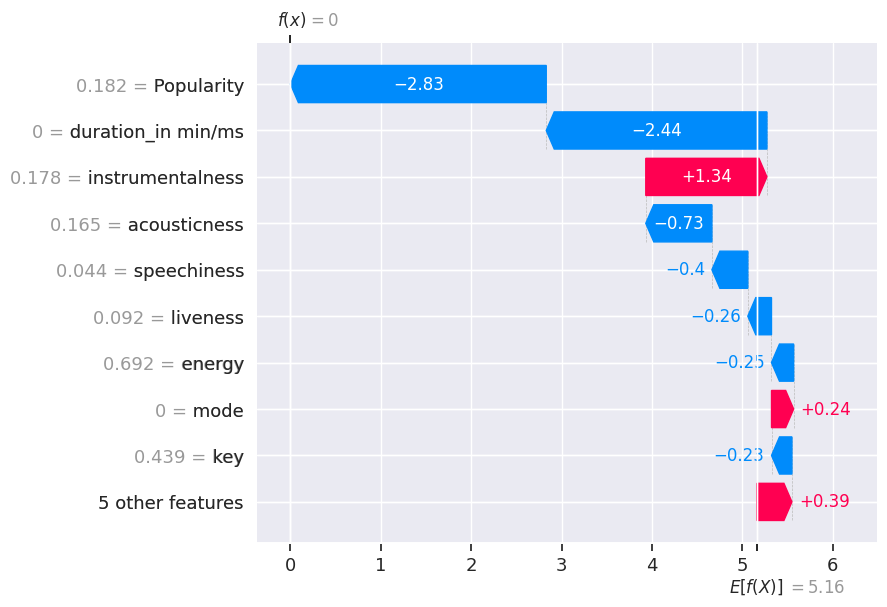

In [ ]:
sample_feature_importance(0, 'waterfall')

For instance 0

1. **Popularity**: This feature has the largest negative impact on the model's prediction with a SHAP value of -2.83. A higher popularity score is associated with a lower predicted value.

2. **Duration_in_min/ms**: With a SHAP value of -2.44, the duration of the song also significantly decreases the model's predicted value. The longer the song, the lower the prediction.

3. **Instrumentalness**: It has a moderate positive impact +1.34 on the prediction.

4. **Acousticness**: Also contributes negatively to the predicted outcome with a SHAP value of -0.73.

5. **Speechiness**, **Liveness**, **Energy**, and **Key**: All of these features have smaller negative impacts on the model's prediction, with varying SHAP values from -0.4 to -0.23.

6. **5 other features**: Collectively have a positive impact on the prediction, with a total SHAP value of +0.39.

The expected value `E[f(X)]` of 5.16 is the base value that the model predicts in the absence of any feature effects. The actual prediction for the instance (`f(x)`) would be adjusted up or down from the base value based on the sum of these SHAP values. If the negative SHAP values outweigh the positive ones, the final prediction would be lower than the base value. Conversely, if the positive values outweigh the negative ones, the prediction would be higher than the base value.

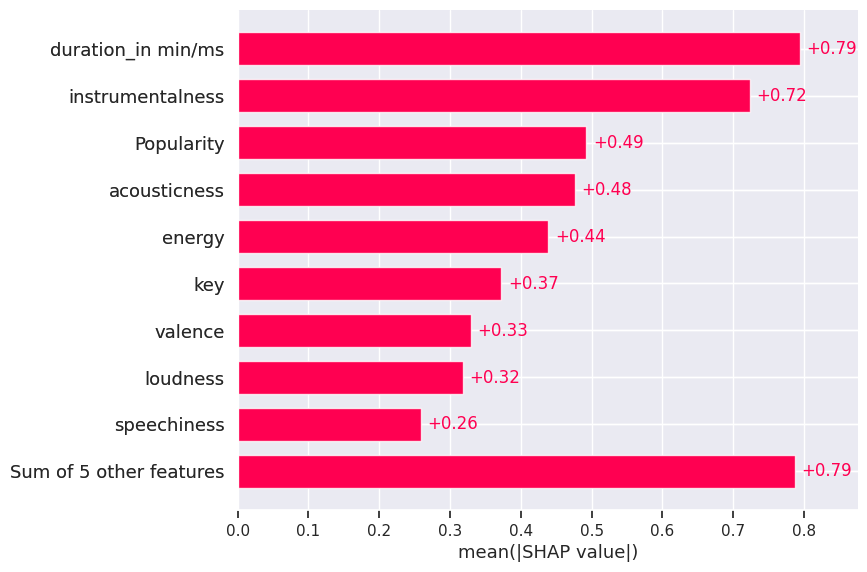

In [ ]:
shap.plots.bar(shap_values)

Overall summary for all instances

1. **Duration_in_min/ms**: This feature has the highest mean absolute SHAP value at +0.79, indicating it has the greatest average impact on the model's predictions.

2. **Instrumentalness**: The second most impactful feature with a mean absolute SHAP value of +0.72.

3. **Popularity**: Shows a substantial average impact on the model's predictions with a mean absolute SHAP value of +0.49.

4. **Acousticness**: Has a moderate mean absolute SHAP value of +0.48.

5. **Energy**: Slightly less impactful than acousticness, with a mean absolute SHAP value of +0.44.

6. **Key**: Has a mean absolute SHAP value of +0.37.

7. **Valence**: Shows a mean absolute SHAP value of +0.33.

8. **Loudness**: Has a mean absolute SHAP value of +0.32.

9. **Speechiness**: The least impactful of the individual features listed, with a mean absolute SHAP value of +0.26.

10. **Sum of 5 other features**: Collectively, these features have a mean absolute SHAP value equal to the highest individual feature, at +0.79.

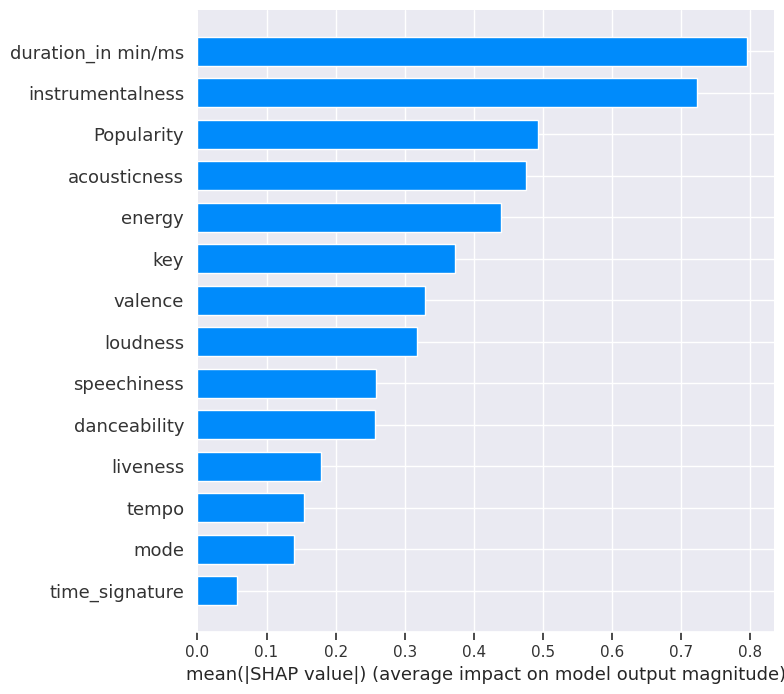

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')


1. **Duration_in_min/ms**: This feature has the highest mean absolute SHAP value, indicating it has the strongest average impact on the model's output.

2. **Instrumentalness**: The second most impactful feature, with a slightly lower mean absolute SHAP value than duration.

3. **Popularity**: Has a moderate mean absolute SHAP value, suggesting a significant influence on the model's output.

4. **Acousticness**: Also has a moderate impact, slightly less than popularity.

5. **Energy**: Shows a somewhat lower impact than acousticness.

6. **Key**: Has a lower mean absolute SHAP value than energy but still contributes noticeably to the model's output.

7. **Valence**: Shows a similar impact to the key.

8. **Loudness**: Has a slightly lower impact than valence.

9. **Speechiness**: Has a lower mean absolute SHAP value, indicating a smaller average impact on the model's output.

10. **Danceability**: Shows a moderate impact, slightly less than speechiness.

11. **Liveness**: Has a small mean absolute SHAP value, suggesting a lesser average influence on the model's output.

12. **Tempo**: Has a similar impact to liveness.

13. **Mode**: Has a smaller mean absolute SHAP value compared to tempo.

14. **Time_signature**: Has the smallest mean absolute SHAP value, indicating it has the least average impact on the model's output among the features presented.

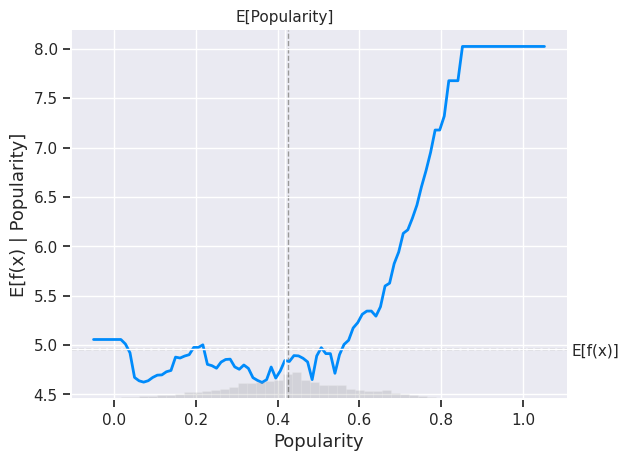

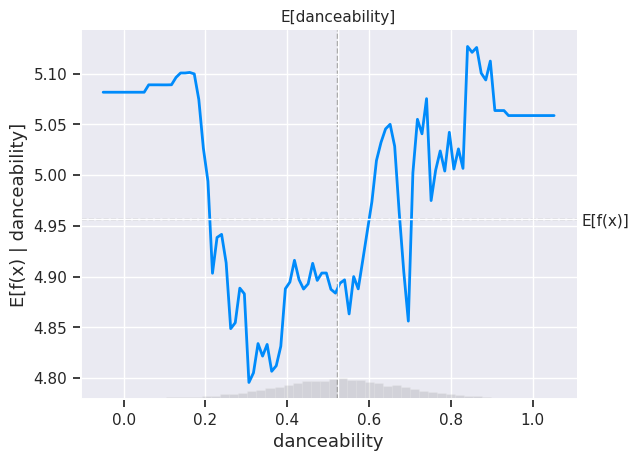

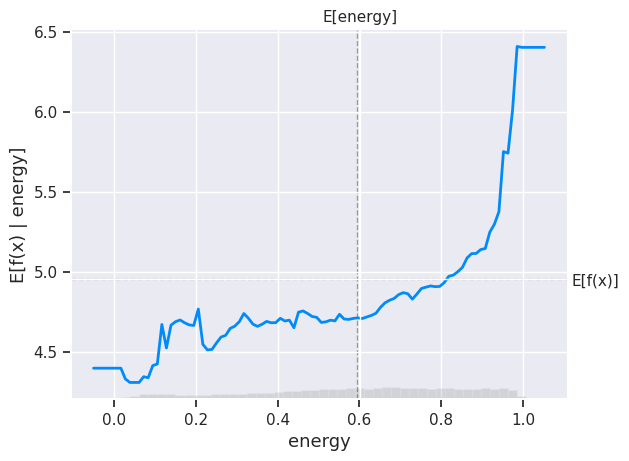

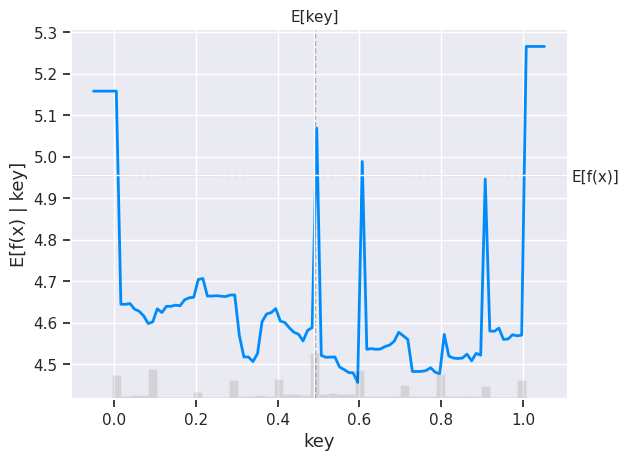

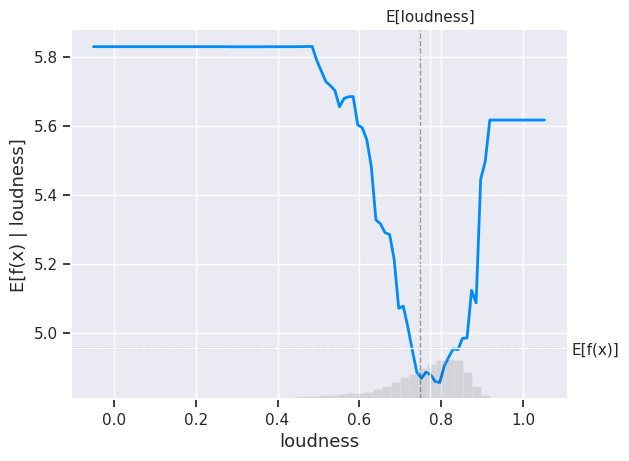

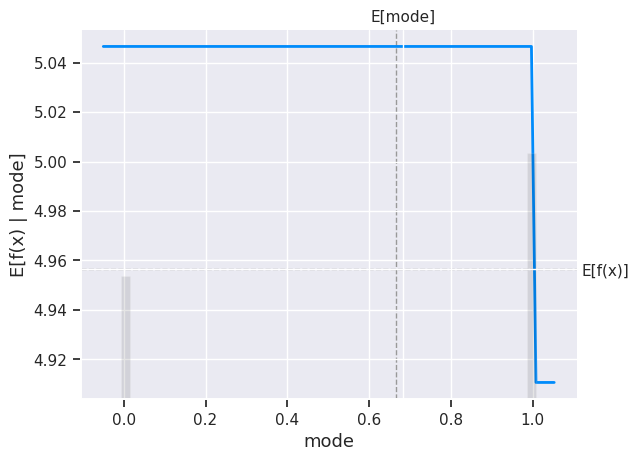

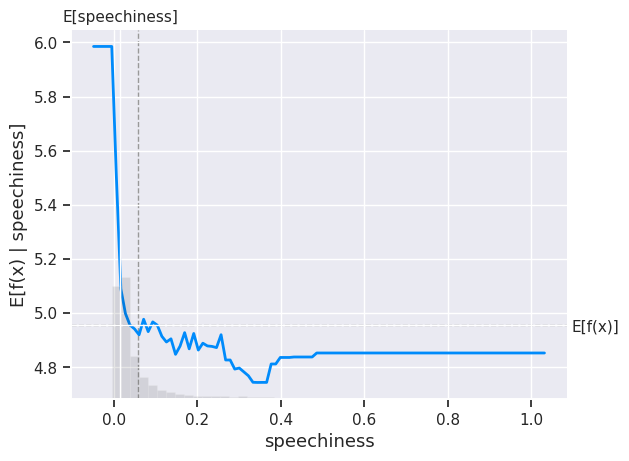

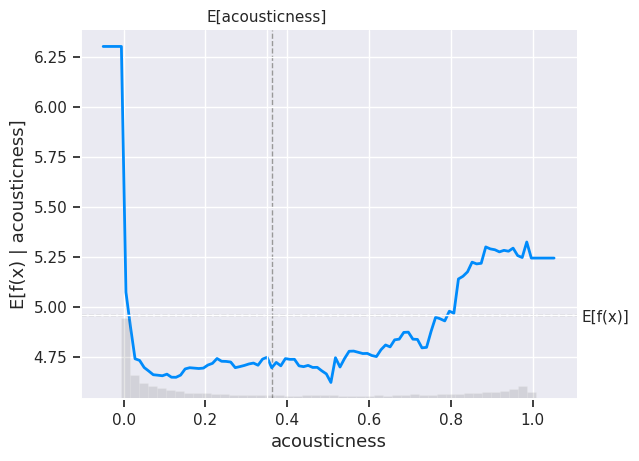

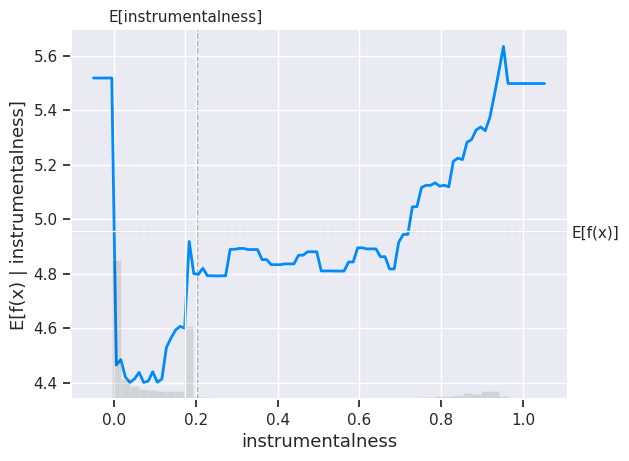

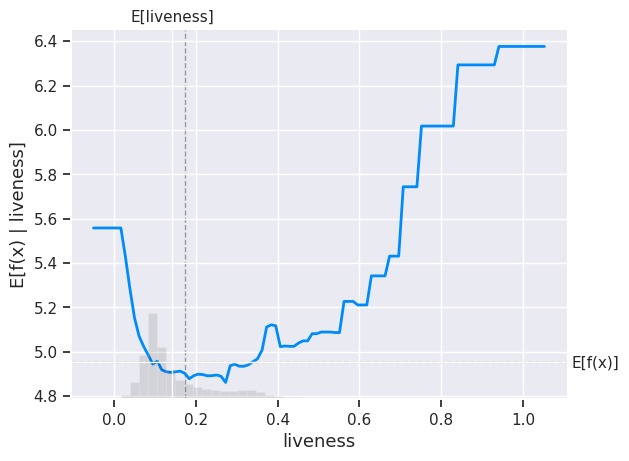

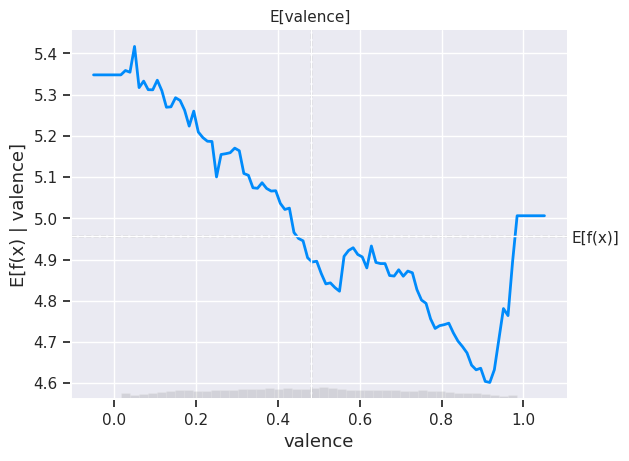

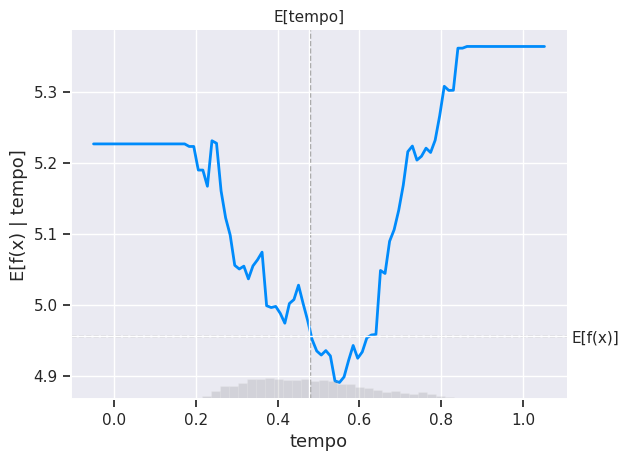

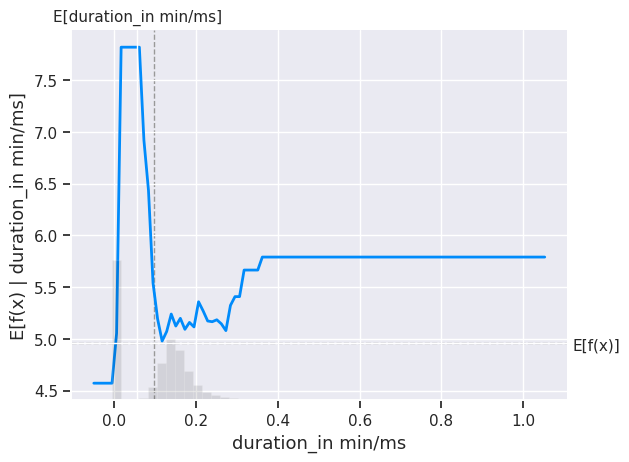

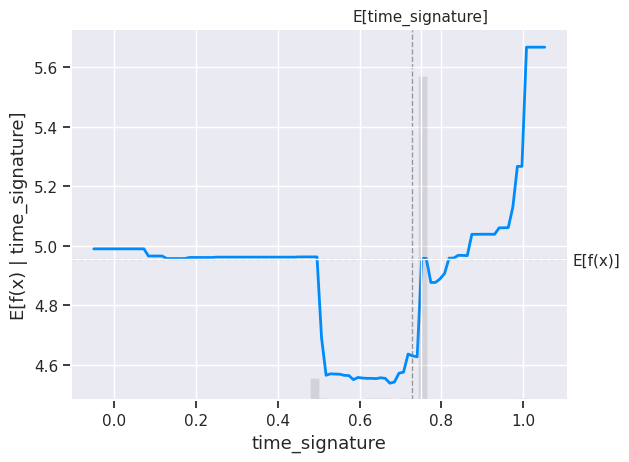

In [ ]:
for each in X.columns:
  partial_dependence_plot(model_xgb,each)

The PDP plots overall show a mixed trend for all the features in contributing to the prediction

In [ ]:
data_point = X_test.iloc[[0]]

# Define a prediction function for your model
predict_fn = lambda x: model_xgb.predict_proba(x)[:, 1]

# Explain the instance
explanation = lime_linear_explainer.explain_instance(
    data_point.values[0],
    predict_fn,
    num_features=len(X_train.columns),
)

# Print the explanation
print(explanation.as_list())

Intercept 0.14438260910089884
Prediction_local [-0.0083253]
Right: 4.2745276e-05
[('Popularity <= 0.32', -0.08777132266409467), ('danceability > 0.64', -0.038340895363434005), ('0.00 < duration_in min/ms <= 0.12', -0.030503899734080187), ('0.02 < acousticness <= 0.23', 0.022177875918812383), ('tempo > 0.58', -0.01813207202339257), ('mode <= 0.00', -0.010972232025549523), ('0.28 < valence <= 0.48', 0.010904950980966185), ('0.78 < loudness <= 0.83', 0.010109413523286427), ('0.09 < liveness <= 0.12', -0.010068894788999357), ('0.62 < energy <= 0.80', 0.00731742510754911), ('0.09 < instrumentalness <= 0.18', -0.006560287966106207), ('0.03 < speechiness <= 0.06', -0.00517748281254005), ('time_signature <= 0.75', 0.0046691972361360135), ('0.30 < key <= 0.50', -0.00035968626940033197)]


Popularity <= 0.32: Decreases the prediction by approximately -0.08777.

danceability > 0.64: Decreases the prediction by approximately -0.03834.

0.00 < duration_in min/ms <= 0.12: Decreases the prediction by approximately -0.03050.

0.02 < acousticness <= 0.23: Increases the prediction by approximately 0.02218.

tempo > 0.58: Decreases the prediction by approximately -0.01813.

mode <= 0.00: Decreases the prediction by approximately -0.01097.

0.28 < valence <= 0.48: Increases the prediction by approximately 0.01090.

0.78 < loudness <= 0.83: Increases the prediction by approximately 0.01011.

0.09 < liveness <= 0.12: Decreases the prediction by approximately -0.01007.

0.62 < energy <= 0.80: Increases the prediction by approximately 0.00732.

0.09 < instrumentalness <= 0.18: Decreases the prediction by approximately -0.00656.

0.03 < speechiness <= 0.06: Decreases the prediction by approximately -0.00518.

time_signature <= 0.75: Increases the prediction by approximately 0.00467.

0.30 < key <= 0.50: Decreases the prediction very slightly by approximately -0.00036.

Popularity <= 0.32: With a contribution of approximately -0.08777, this is the most significant feature, and it has a negative impact on the prediction.


danceability > 0.64: The second most influential, with a contribution of -0.03834, also negatively impacting the prediction.


0.00 < duration_in min/ms <= 0.12: This feature decreases the prediction by approximately -0.03050, making it the third most important in terms of impact.

Overall - Duration_in_min/ms, Popularity,  Danceability seem to the important features of the tree based model

In [ ]:
explanation.show_in_notebook()
plt.show()

In [ ]:
!pip3 install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=e285faf7de0da35561ca877f8506f80869cf1d1c7d748cf001ad6a215326eca7
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

AutoML, or Automated Machine Learning, is a set of tools and techniques that automates the end-to-end process of building and optimizing machine learning models. It streamlines tasks like data preprocessing, feature selection, algorithm selection, hyperparameter tuning, and model evaluation, making machine learning accessible to non-experts and accelerating the model development process.

H2O AutoML is a specific AutoML platform offered by H2O.ai. It's designed to simplify and automate the model-building process, providing a user-friendly interface for data scientists and analysts. H2O AutoML automatically explores a variety of machine learning algorithms, hyperparameter configurations, and preprocessing techniques to find the best model for a given dataset, ultimately saving time and improving model performance.


In [188]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 hour 47 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    25 days
H2O_cluster_name:           H2O_from_python_unknownUser_1qfb81
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    384.2 Mb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [189]:
df = df_master.copy()

In [190]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [191]:
df["Class"]=df["Class"].asfactor()

In [192]:
train, test = df.split_frame(ratios=[0.9], seed = 1)

In [193]:
aml = H2OAutoML(balance_classes=True,seed =1)

In [194]:
aml.train(training_frame = train, y = "Class")

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_3_20231204_54709


Model Summary: 
    number_of_trees
--  -----------------
    14

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.1935974174389813
RMSE: 0.4399970652617825
LogLoss: 0.5594292500174134
Mean Per-Class Error: 0.15024968250702356
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     3     4     5     6     7     8     9     10    Error      Rate
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ---------  --------------
2989  0     0     17    41    0     0     21    0     6     0     0.0276513  85 / 3,074
0     2204  143   0     0     93    225   0     131   91    200   0.286038   883 / 3,087
0     116   2720  0     0     24    83    0     24    49    71    0.118886   367 / 3,087
23    0     0     3065  32    0     0     4     0     0     0     0.018886   59 / 3,124
49    0     0     1     3061  0     0     1     0     3     0     0.0173355  54 / 3,115
0     29    50    0     0     2952  43    0     5     80    31    0.0746082  238 / 3,190
0     363   156   0     0     97    2051  1     150   129   235   0.355437   1,131 / 3,182
21    0     0     28    1     0     0     3049  0     0     0     0.0161342  50 / 3,099
0     70    27    0     0     1     79    0     2817  18    157   0.111076   352 / 3,169
34    110   105   6     34    187   114   1     20    2321  144   0.245449   755 / 3,076
13    187   203   9     38    56    177   0     309   183   1907  0.381246   1,175 / 3,082
3129  3079  3404  3126  3207  3410  2772  3077  3456  2880  2745  0.150182   5,149 / 34,285

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.849818
2    0.949541
3    0.981304
4    0.993321
5    0.998104
6    0.999562
7    0.999942
8    0.999971
9    1
10   1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.27424742607362373
RMSE: 0.5236863814093543
LogLoss: 0.7995423129467921
Mean Per-Class Error: 0.2677552929906393
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    5    6    7    8    9    10    Error      Rate
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ----  ---------  -------------
399  0    0    10   22   0    0    4    0    0    0     0.0827586  36 / 435
0    198  30   0    0    24   72   0    25   23   54    0.535211   228 / 426
0    28   313  0    0    6    32   0    6    8    20    0.242131   100 / 413
14   0    0    405  10   0    0    2    0    0    0     0.0603248  26 / 431
17   0    0    2    423  0    0    0    0    2    0     0.0472973  21 / 444
0    4    10   0    0    365  13   0    1    28   3     0.139151   59 / 424
0    81   35   0    0    27   170  0    35   32   53    0.60739    263 / 433
9    0    0    5    1    0    0    422  0    0    0     0.0343249  15 / 437
0    23   3    0    0    0    20   0    345  2    35    0.193925   83 / 428
0    26   19   2    9    50   34   0    2    266  39    0.404922   181 / 447
4    47   50   0    8    13   60   0    60   39   189   0.597872   281 / 470
443  407  460  424  473  485  401  428  474  400  393   0.27005    1,293 / 4,788

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.72995
2    0.8632
3    0.935464
4    0.974937
5    0.990184
6    0.997285
7    0.9

In [195]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                  mean_per_class_error    logloss      rmse       mse
------------------------------------------------------  ----------------------  ---------  --------  --------
XGBoost_1_AutoML_3_20231204_54709                                     0.267755   0.799542  0.523686  0.274247
GBM_1_AutoML_3_20231204_54709                                         0.307476   0.998936  0.596251  0.355516
StackedEnsemble_BestOfFamily_1_AutoML_3_20231204_54709                0.386124   1.791     0.813109  0.661146
GLM_1_AutoML_3_20231204_54709                                         0.565533   2.22488   0.88995   0.792011
[4 rows x 5 columns]

In [196]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_3_20231204_54709


Model Summary: 
    number_of_trees
--  -----------------
    14

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.1935974174389813
RMSE: 0.4399970652617825
LogLoss: 0.5594292500174134
Mean Per-Class Error: 0.15024968250702356
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     3     4     5     6     7     8     9     10    Error      Rate
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ---------  --------------
2989  0     0     17    41    0     0     21    0     6     0     0.0276513  8

In [197]:
best_model.model_performance(test)

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.26790120631772524
RMSE: 0.5175917371034098
LogLoss: 0.7812685509152123
Mean Per-Class Error: 0.2625685145429824
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    5    6    7    8    9    10    Error      Rate
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ----  ---------  -------------
471  0    0    7    24   0    0    3    0    2    0     0.0710059  36 / 507
0    236  38   0    0    20   81   0    51   25   48    0.527054   263 / 499
0    25   420  0    0    9    35   0    6    20   24    0.220779   119 / 539
11   0    0    499  9    0    0    2    0    0    0     0.0422265  22 / 521
17   0    0    4    469  0    0    0    0    0    0     0.0428571  21 / 490
0    8    12   0    0    396  19   0    1    31   5     0.161017   76 / 472
0    72   39   0    0    24   206  1    37   35   62    0.567227   270 / 476
11   0    0    8    1    0    0    485  0    0    0     0.039604   20 / 505
0    21   3    0    0    0    18   0    419  2    47    0.178431   91 / 510
6    25   31   4    6    54   38   0    5    330  42    0.390018   211 / 541
3    55   54   4    7    11   69   0    65   45   170   0.648033   313 / 483
519  442  597  526  516  514  466  491  584  490  398   0.260148   1,442 / 5,543

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.739852
2    0.868663
3    0.933971
4    0.97348
5    0.991701
6    0.998376
7    0.999639
8    1
9    1
10   1

In [238]:
best_model= model_xgb

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

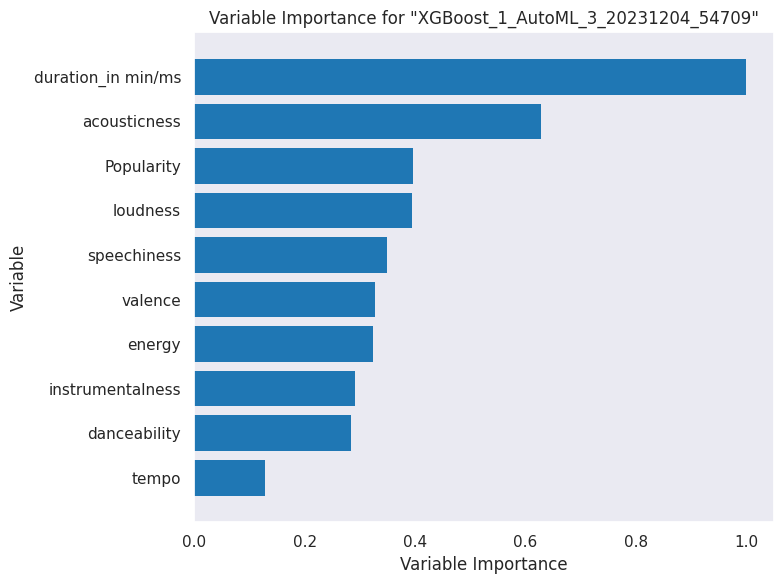

In [198]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

"Duration in min/ms" is the most important feature, having the highest score which is just below 1.0, indicating it has the strongest relationship with the target variable being predicted by the model. "Acousticness" and "Popularity" also appear to be quite important, though less so than "Duration". Features like "Tempo", "Danceability", and "Instrumentalness" have the least importance in this model, with "Tempo" being the least important variable on this chart.

In [201]:
aml.explain_row(frame = test, row_index = 10, figsize = (8,6), exclude_explanations = "leaderboard")

In [212]:
explainer = shap.Explainer(model_xgb.predict, X_train)
shap_values = explainer(X_test[:10])

PermutationExplainer explainer: 11it [00:21,  2.65s/it]


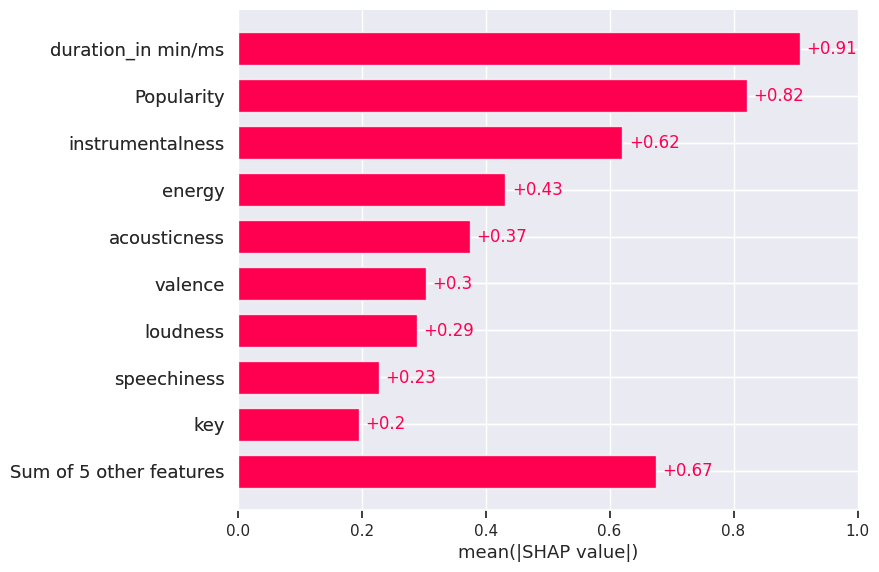

In [233]:
shap.plots.bar(shap_values)

The "Duration_in min/ms" feature has the highest average impact on the model's output, with a mean SHAP value of around +0.91, indicating it has a significant positive effect on the prediction. "Popularity" also shows a strong positive impact with a mean SHAP value of around +0.82. The "Sum of 5 other features" has a mean SHAP value of +0.67.

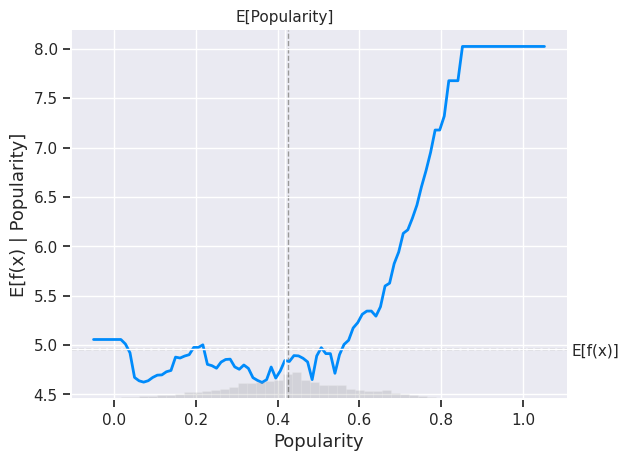

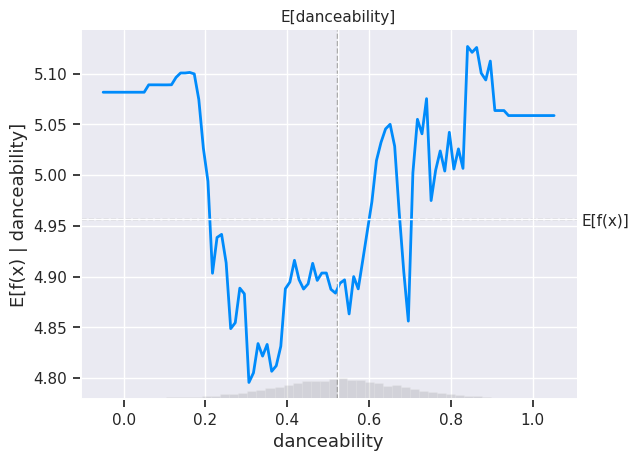

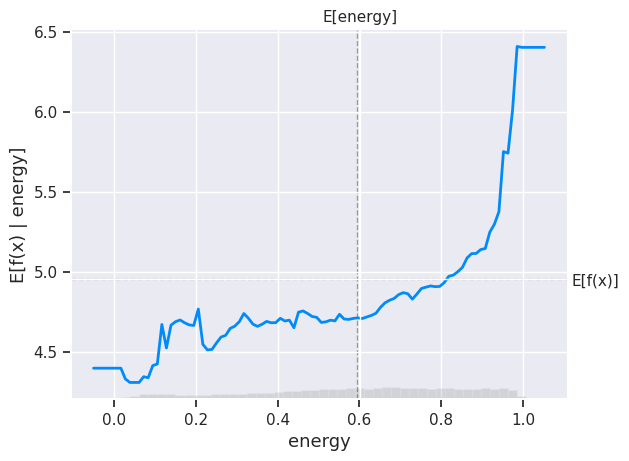

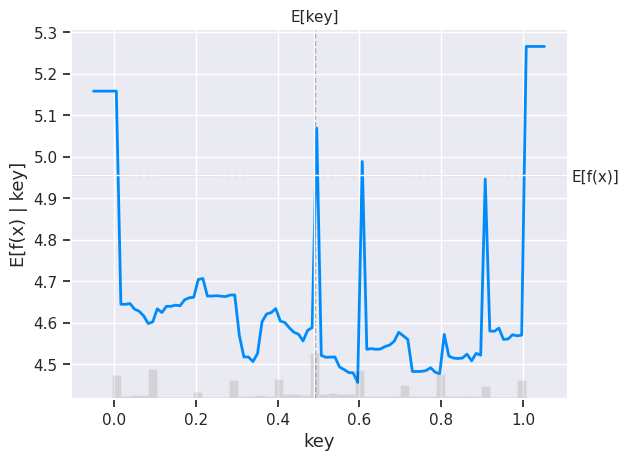

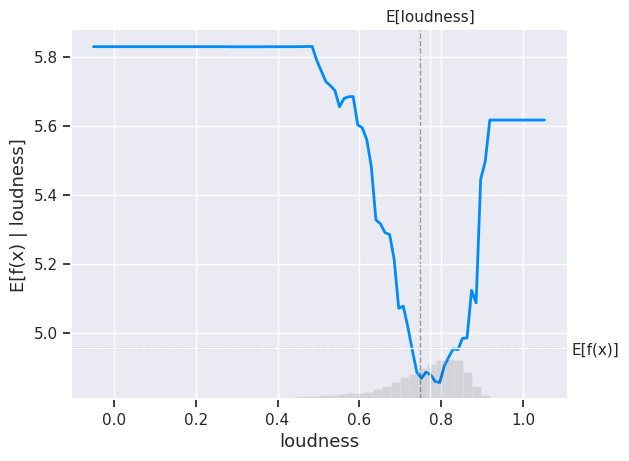

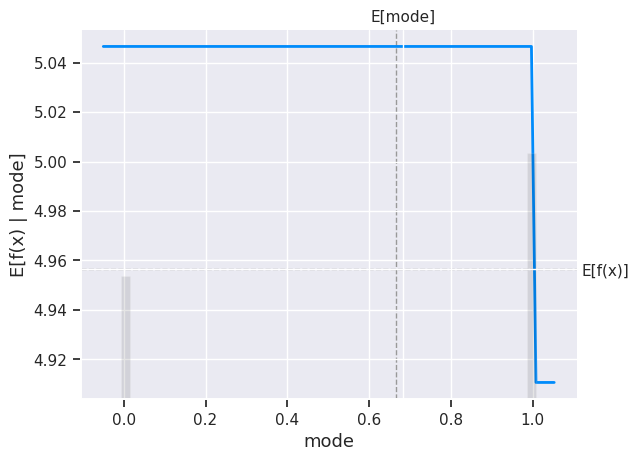

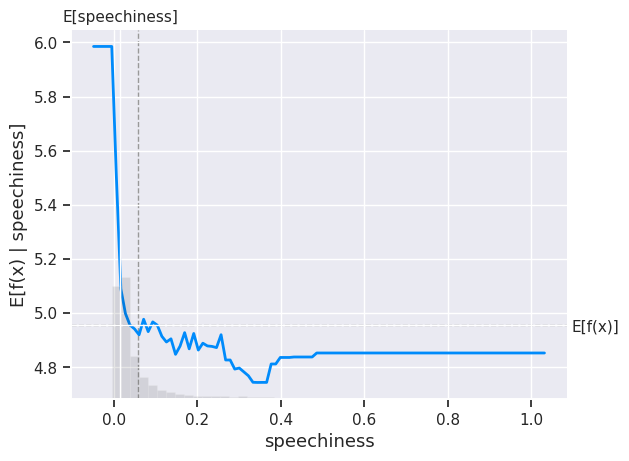

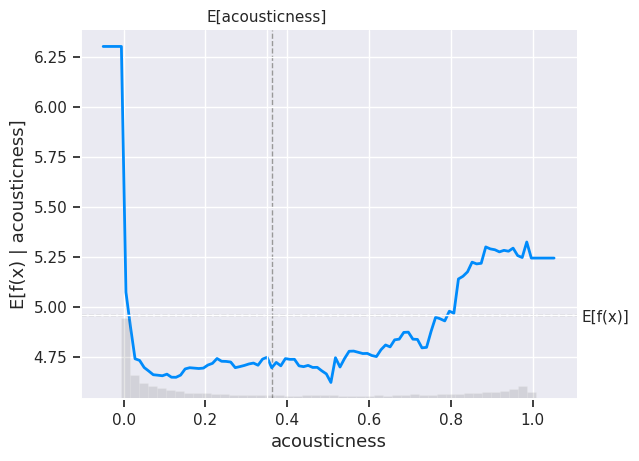

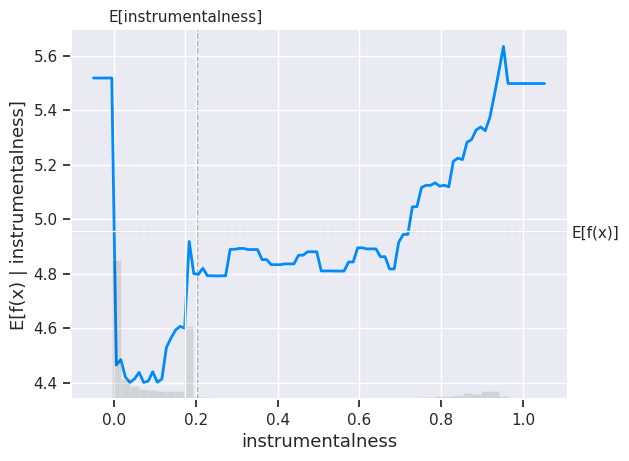

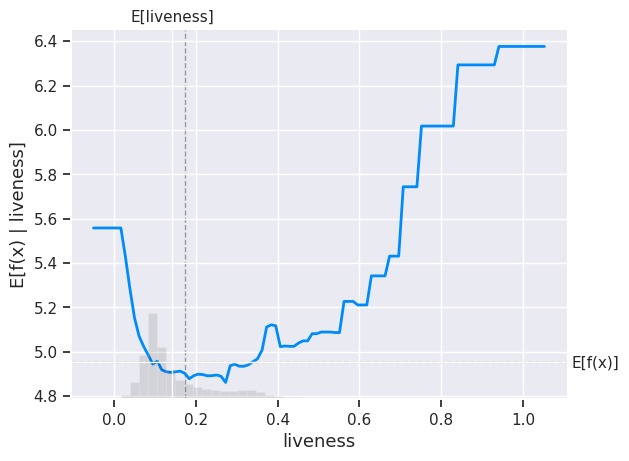

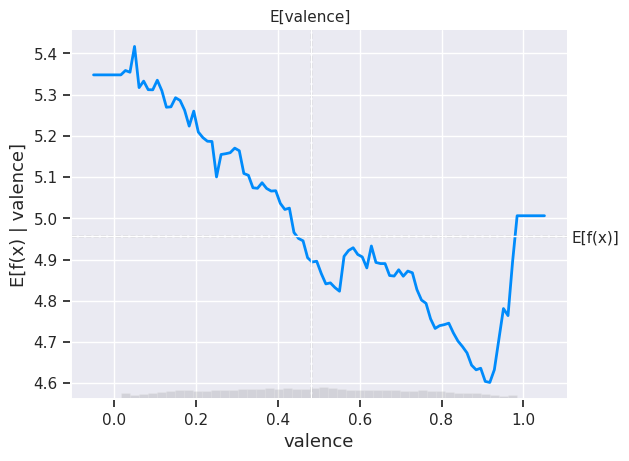

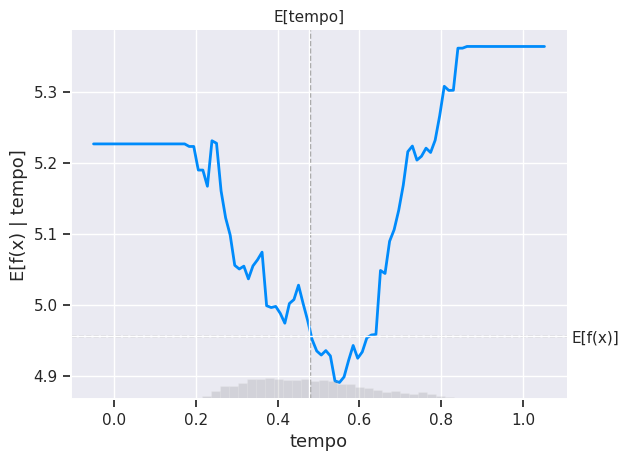

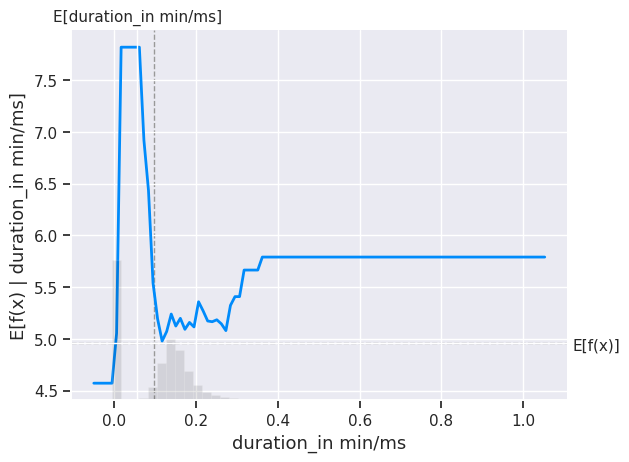

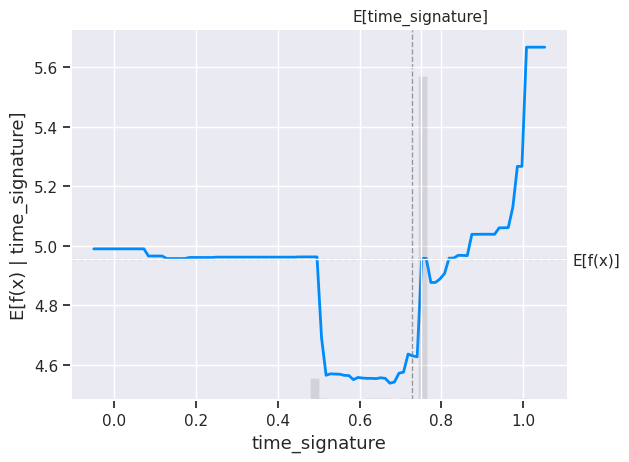

In [241]:
for each in ['Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature']:
  partial_dependence_plot(best_model,each)

The PDP plots overall show a mixed trend for all the features in contributing to the prediction

In [239]:
data_point = X_test.iloc[[1]]

# Define a prediction function for your model
predict_fn = lambda x: best_model.predict_proba(x)[:, 1]

# Explain the instance
explanation = lime_linear_explainer.explain_instance(
    data_point.values[0],
    predict_fn,
    num_features=len(X_train.columns),
)

# Print the explanation
print(explanation.as_list())

Intercept 0.10266218395748267
Prediction_local [0.07228243]
Right: 5.7735037e-05
[('Popularity > 0.53', 0.0350668656861695), ('0.00 < duration_in min/ms <= 0.12', -0.025521310497622483), ('instrumentalness <= 0.00', -0.020896246529510352), ('speechiness <= 0.01', 0.014386177096643114), ('loudness <= 0.70', -0.01429677484321022), ('tempo > 0.58', -0.013003674481372554), ('valence <= 0.28', -0.012703703302183424), ('0.00 < mode <= 1.00', 0.012578362348993028), ('energy <= 0.42', -0.009739125578466623), ('liveness <= 0.09', 0.008672373391519477), ('0.30 < key <= 0.50', -0.006358631525433584), ('0.53 < danceability <= 0.64', -0.006074889819851598), ('0.23 < acousticness <= 0.72', 0.005601554286303413), ('time_signature <= 0.75', 0.0019092708344980117)]


In [240]:
explanation.show_in_notebook()
plt.show()

Popularity > 0.53: Increases the prediction by approximately 0.03507.

0.00 < duration_in min/ms <= 0.12: Decreases the prediction by approximately -0.02552.

instrumentalness <= 0.00: Decreases the prediction by approximately -0.02090.

speechiness <= 0.01: Increases the prediction by approximately 0.01439.

loudness <= 0.70: Decreases the prediction by approximately -0.01430.

tempo > 0.58: Decreases the prediction by approximately -0.01300.

valence <= 0.28: Decreases the prediction by approximately -0.01270.

0.00 < mode <= 1.00: Increases the prediction by approximately 0.01258.

energy <= 0.42: Decreases the prediction by approximately -0.00974.

liveness <= 0.09: Increases the prediction by approximately 0.00867.

0.30 < key <= 0.50: Decreases the prediction by approximately -0.00636.

0.53 < danceability <= 0.64: Decreases the prediction by approximately -0.00607.

0.23 < acousticness <= 0.72: Increases the prediction by approximately 0.00560.

time_signature <= 0.75: Increases the prediction by approximately 0.00191.

Conclusion:

A linear model, tree based model and automl model has been applied for the dataset.

SHAP, PDP, LIME analysis has been done on the models and the inference has been explained after each section

Overall, it is observed that duration of the track, and popularity accounts the most importance in predicting the genre of the song.



#REFERENCES

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://acerta.ai/blog/understanding-machine-learning-with-shap-analysis/

https://c3.ai/glossary/data-science/lime-local-interpretable-model-agnostic-explanations/

https://christophm.github.io/interpretable-ml-book/pdp.html


#Copyright (c) 2023 Agash Uthayasuriyan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.